In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
from time import perf_counter

sys.path.append("/Net/Groups/BSI/work_scratch/ppapastefanou/src/QPy")

from src.postprocessing.qnc_defintions import Time_Reduction_Type
from src.postprocessing.qnc_output_parser import QNC_output_parser
from src.postprocessing.qnc_ncdf_reader import QNC_ncdf_reader
from src.postprocessing.qnc_rescaler import QNC_Rescaler
from src.postprocessing.qnc_obs_reader import QNC_obs_reader

In [2]:
os.listdir("/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/pheno_hydro")

['06_std_only',
 '03_manu_soil_params_phenology',
 '02_manu_soil_params_phenology',
 '01_manu_soil_params_phenology',
 '04_manu_soil_params_phenology',
 '05_manu_soil_params_phenology',
 '05_std_only']

In [64]:
OUTPUT_DIR = '/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/kmax_gammastem/10_run_slope_opt_manu_soil_params'
OUTPUT_DIR = '/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/pheno_hydro/04_manu_soil_params_phenology'
#OUTPUT_DIR = '/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/pheno_hydro/06_std_only'
#OUTPUT_DIR = '/Net/Groups/BSI/scratch/ppapastefanou/simulations/QPy/kmax_gammastem/11_std_only'
post_dir = os.path.join(OUTPUT_DIR, 'post')
rmse_file = os.path.join(post_dir, 'standard_ranking.csv')
parameter_file = os.path.join(OUTPUT_DIR, 'parameters.csv')

In [65]:
df_parameters = pd.read_csv(parameter_file)
df_parameters

,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,root_scale,slope_leaf_close,gdd_t_air_threshold,gdd_t_air_req,k_gdd
0,4.35290,0,0,169.82412,-0.66731,5.97765,-7.000000e-07,-9.39041,1.611468e-07,0.52800,296.81715,9.80898,9.0,400.0,0.0154
1,4.20562,1,1,188.61013,-0.66245,5.86741,-6.000000e-07,-9.64332,7.766642e-08,0.52813,283.36871,8.06886,9.0,400.0,0.0154
2,2.84888,2,2,184.54530,-0.62806,5.96030,-6.000000e-07,-9.72810,1.245824e-07,0.52054,276.09839,8.21010,9.0,400.0,0.0154
3,2.67183,3,3,110.09427,-0.80765,5.79032,-8.000000e-07,-9.04066,1.549773e-07,0.51879,295.89044,9.96566,9.0,400.0,0.0154
4,3.75389,4,4,103.77991,-0.58384,5.90243,-8.000000e-07,-9.05021,6.130605e-08,0.51287,255.28667,7.23958,9.0,400.0,0.0154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,4.29706,16379,16379,152.64417,-0.62877,5.75528,-6.000000e-07,-10.62172,5.579829e-08,0.52641,250.77082,8.54340,9.0,400.0,0.0154
16380,2.79920,16380,16380,168.03452,-0.59352,5.93306,-7.000000e-07,-9.55169,5.224399e-08,0.50254,292.64070,6.26519,9.0,400.0,0.0154
16381,2.66716,16381,16381,145.26355,-0.60268,5.94279,-6.000000e-07,-10.53278,5.093572e-08,0.52031,263.23205,7.35481,9.0,400.0,0.0154
16382,3.08671,16382,16382,141.61666,-0.54418,5.83114,-6.000000e-07,-10.64443,1.268865e-07,0.52249,264.29176,9.94371,9.0,400.0,0.0154


In [66]:
df_rmse = pd.read_csv(rmse_file)
df_rmse= pd.merge(df_parameters, df_rmse, on='fid')


In [6]:
df_rmse

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
0,-1.42422,0,0,177.02816,-0.83989,5.69387,-0.000008,-11.08914,3.359702e-07,0.51495,...,400.0,0.0154,0.353956,1.636023,3.837999,3.319620,49.618089,54.506601,NaN,-0.069883
1,-2.20187,1,1,150.44905,-0.67183,5.95397,-0.000010,-10.81645,2.716911e-08,0.46190,...,400.0,0.0154,0.353956,1.636023,3.851101,3.147336,42.902760,43.826049,NaN,-0.688116
2,-0.80097,2,2,188.39163,-0.80665,5.83511,-0.000002,-9.13110,7.064269e-09,0.50410,...,400.0,0.0154,0.353956,1.636023,3.826016,3.262648,39.821782,34.709280,NaN,-0.777284
3,-1.12370,3,3,116.65181,-0.88537,5.91168,-0.000009,-8.18479,7.572708e-08,0.55495,...,400.0,0.0154,0.353956,1.636023,3.789609,3.221863,39.582469,34.842812,NaN,-0.757561
4,-1.14748,4,4,167.95802,-0.76513,5.72420,-0.000008,-8.96730,3.264946e-07,0.59118,...,400.0,0.0154,0.353956,1.636023,3.904915,3.273875,40.240922,35.510610,NaN,-0.757607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,-0.90464,10235,10235,129.02872,-0.58512,5.70789,-0.000005,-8.25317,8.471420e-08,0.56458,...,400.0,0.0154,0.353956,1.636023,3.758538,3.213001,39.420695,34.505850,NaN,-0.760417
10236,-0.87756,10236,10236,103.79202,-0.58467,5.74373,-0.000010,-10.70809,3.054535e-08,0.52812,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.531264,43.398566,NaN,0.000000
10237,-1.08944,10237,10237,116.78804,-0.54508,5.57909,-0.000008,-11.98562,3.976714e-08,0.57912,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,51.225762,46.115663,NaN,0.000000
10238,-1.49180,10238,10238,160.73715,-0.72962,5.65293,-0.000007,-10.87092,7.849774e-08,0.50611,...,400.0,0.0154,0.353956,1.636023,4.461891,3.657107,42.384748,40.312415,NaN,-0.869840


In [7]:
df_rmse.sort_values(by = 'rmse_psi_stem')

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
10232,-1.64673,10232,10232,121.21728,-0.55186,5.73981,-0.000007,-9.99137,1.137410e-06,0.48574,...,400.0,0.0154,0.353956,1.636023,3.133018,2.799275,48.558977,52.251553,NaN,-0.289135
10233,-0.51329,10233,10233,164.52049,-0.53674,5.88297,-0.000003,-9.69412,9.520951e-07,0.49922,...,400.0,0.0154,0.353956,1.636023,3.401617,2.884734,42.323347,43.756468,NaN,-0.517712
10234,-1.42731,10234,10234,103.90206,-0.57831,5.53408,-0.000002,-11.51410,4.216758e-07,0.53254,...,400.0,0.0154,0.353956,1.636023,3.980067,3.304467,41.205811,38.269310,NaN,-0.732452
10235,-0.90464,10235,10235,129.02872,-0.58512,5.70789,-0.000005,-8.25317,8.471420e-08,0.56458,...,400.0,0.0154,0.353956,1.636023,3.758538,3.213001,39.420695,34.505850,NaN,-0.760417
10236,-0.87756,10236,10236,103.79202,-0.58467,5.74373,-0.000010,-10.70809,3.054535e-08,0.52812,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.531264,43.398566,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,-1.82218,35,35,155.21781,-0.70962,5.89500,-0.000003,-8.98023,7.824338e-08,0.57786,...,400.0,0.0154,0.353956,1.636023,3.772671,3.236493,39.539254,34.485690,NaN,-0.770373
36,-1.80691,36,36,110.64727,-0.66674,5.70901,-0.000010,-11.63570,4.839535e-08,0.50085,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,42.925921,42.296778,NaN,0.000000
37,-0.72170,37,37,171.55828,-0.69829,5.67550,-0.000006,-8.97450,1.131930e-08,0.48672,...,400.0,0.0154,0.353956,1.636023,3.914144,3.264730,40.338061,35.898136,NaN,-0.742664
38,-0.61205,38,38,155.31553,-0.52207,5.52045,-0.000003,-11.91073,5.285727e-08,0.51961,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.153333,43.190700,NaN,0.000000


In [8]:
df_rmse

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
0,-1.42422,0,0,177.02816,-0.83989,5.69387,-0.000008,-11.08914,3.359702e-07,0.51495,...,400.0,0.0154,0.353956,1.636023,3.837999,3.319620,49.618089,54.506601,NaN,-0.069883
1,-2.20187,1,1,150.44905,-0.67183,5.95397,-0.000010,-10.81645,2.716911e-08,0.46190,...,400.0,0.0154,0.353956,1.636023,3.851101,3.147336,42.902760,43.826049,NaN,-0.688116
2,-0.80097,2,2,188.39163,-0.80665,5.83511,-0.000002,-9.13110,7.064269e-09,0.50410,...,400.0,0.0154,0.353956,1.636023,3.826016,3.262648,39.821782,34.709280,NaN,-0.777284
3,-1.12370,3,3,116.65181,-0.88537,5.91168,-0.000009,-8.18479,7.572708e-08,0.55495,...,400.0,0.0154,0.353956,1.636023,3.789609,3.221863,39.582469,34.842812,NaN,-0.757561
4,-1.14748,4,4,167.95802,-0.76513,5.72420,-0.000008,-8.96730,3.264946e-07,0.59118,...,400.0,0.0154,0.353956,1.636023,3.904915,3.273875,40.240922,35.510610,NaN,-0.757607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,-0.90464,10235,10235,129.02872,-0.58512,5.70789,-0.000005,-8.25317,8.471420e-08,0.56458,...,400.0,0.0154,0.353956,1.636023,3.758538,3.213001,39.420695,34.505850,NaN,-0.760417
10236,-0.87756,10236,10236,103.79202,-0.58467,5.74373,-0.000010,-10.70809,3.054535e-08,0.52812,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.531264,43.398566,NaN,0.000000
10237,-1.08944,10237,10237,116.78804,-0.54508,5.57909,-0.000008,-11.98562,3.976714e-08,0.57912,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,51.225762,46.115663,NaN,0.000000
10238,-1.49180,10238,10238,160.73715,-0.72962,5.65293,-0.000007,-10.87092,7.849774e-08,0.50611,...,400.0,0.0154,0.353956,1.636023,4.461891,3.657107,42.384748,40.312415,NaN,-0.869840


In [9]:
df_rmse.sort_values(by = 'rmse_gpp_22')

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
8845,-2.02452,8845,8845,158.69670,-0.64720,5.98757,-0.000001,-8.80168,1.081621e-06,0.45251,...,400.0,0.0154,0.353956,1.636023,3.026534,2.887741,44.033555,47.138252,NaN,-0.252713
5473,-1.81365,5473,5473,112.73529,-0.73159,5.53250,-0.000002,-8.20597,1.856155e-06,0.46973,...,400.0,0.0154,0.353956,1.636023,3.026988,2.893104,44.699952,48.034200,NaN,-0.195660
1080,-2.48009,1080,1080,106.13862,-0.79673,5.62642,-0.000006,-8.05016,6.555192e-07,0.46599,...,400.0,0.0154,0.353956,1.636023,3.031719,2.884059,44.619838,47.886172,NaN,-0.209445
7772,-2.30863,7772,7772,112.05304,-0.51587,5.78842,-0.000004,-8.23619,6.570257e-07,0.46303,...,400.0,0.0154,0.353956,1.636023,3.031867,2.880509,43.838402,46.848735,NaN,-0.254639
9128,-1.61873,9128,9128,136.95646,-0.63735,5.93685,-0.000002,-8.52240,1.702983e-06,0.47221,...,400.0,0.0154,0.353956,1.636023,3.032046,2.884620,45.015104,48.398993,NaN,-0.212738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,-1.53817,4085,4085,115.01889,-0.52358,5.61563,-0.000007,-11.35601,5.740376e-08,0.48637,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,42.811381,43.150477,NaN,0.000000
38,-0.61205,38,38,155.31553,-0.52207,5.52045,-0.000003,-11.91073,5.285727e-08,0.51961,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.153333,43.190700,NaN,0.000000
4088,-0.56180,4088,4088,158.47161,-0.86108,5.72049,-0.000007,-11.95495,1.406416e-08,0.47898,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,43.080460,42.106405,NaN,0.000000
36,-1.80691,36,36,110.64727,-0.66674,5.70901,-0.000010,-11.63570,4.839535e-08,0.50085,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,42.925921,42.296778,NaN,0.000000


In [10]:
df_rmse.sort_values(by = 'rmse_le_22')

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
8361,-2.17931,8361,8361,180.02147,-0.51310,5.54681,-2.000000e-07,-8.09801,1.318552e-06,0.47408,...,400.0,0.0154,0.353956,1.636023,3.198377,2.935241,37.750101,35.966168,NaN,-0.512252
71,-1.74722,71,71,147.15892,-0.77559,5.51878,-3.000000e-07,-8.07725,1.754133e-07,0.47580,...,400.0,0.0154,0.353956,1.636023,3.369412,3.053192,37.762032,33.983610,NaN,-0.641210
9765,-2.20065,9765,9765,189.09524,-0.58813,5.61362,-7.000000e-07,-8.01150,7.410950e-08,0.45244,...,400.0,0.0154,0.353956,1.636023,3.332814,3.011912,37.762837,34.829804,NaN,-0.611902
9881,-2.45631,9881,9881,149.61045,-0.83807,5.96874,-5.000000e-07,-8.07587,3.447389e-07,0.48324,...,400.0,0.0154,0.353956,1.636023,3.340350,3.022768,37.763384,34.637729,NaN,-0.598230
7622,-1.78128,7622,7622,126.90721,-0.71169,5.80578,-1.000000e-07,-8.74946,7.856833e-07,0.47869,...,400.0,0.0154,0.353956,1.636023,3.328248,3.018942,37.791072,35.012965,NaN,-0.590199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,-1.52609,788,788,105.96232,-0.64165,5.90502,-5.600000e-06,-11.37409,6.203860e-09,0.59994,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,54.469033,49.119336,NaN,0.000000
4811,-1.77294,4811,4811,149.10535,-0.61546,5.88344,-2.800000e-06,-11.90144,5.234520e-09,0.58664,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,54.491705,49.142921,NaN,0.000000
4903,-1.67568,4903,4903,113.82763,-0.65858,5.70866,-4.600000e-06,-11.40467,5.219056e-09,0.59469,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,54.528250,49.169655,NaN,0.000000
7462,-0.50363,7462,7462,154.16389,-0.75546,5.93499,-8.000000e-06,-10.01084,5.576896e-09,0.59802,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,54.580461,49.217665,NaN,0.000000


In [11]:
df_rmse.sort_values(by = 'rmse_sapflow_norm')

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
0,-1.42422,0,0,177.02816,-0.83989,5.69387,-0.000008,-11.08914,3.359702e-07,0.51495,...,400.0,0.0154,0.353956,1.636023,3.837999,3.319620,49.618089,54.506601,NaN,-0.069883
1,-2.20187,1,1,150.44905,-0.67183,5.95397,-0.000010,-10.81645,2.716911e-08,0.46190,...,400.0,0.0154,0.353956,1.636023,3.851101,3.147336,42.902760,43.826049,NaN,-0.688116
2,-0.80097,2,2,188.39163,-0.80665,5.83511,-0.000002,-9.13110,7.064269e-09,0.50410,...,400.0,0.0154,0.353956,1.636023,3.826016,3.262648,39.821782,34.709280,NaN,-0.777284
3,-1.12370,3,3,116.65181,-0.88537,5.91168,-0.000009,-8.18479,7.572708e-08,0.55495,...,400.0,0.0154,0.353956,1.636023,3.789609,3.221863,39.582469,34.842812,NaN,-0.757561
4,-1.14748,4,4,167.95802,-0.76513,5.72420,-0.000008,-8.96730,3.264946e-07,0.59118,...,400.0,0.0154,0.353956,1.636023,3.904915,3.273875,40.240922,35.510610,NaN,-0.757607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,-0.90464,10235,10235,129.02872,-0.58512,5.70789,-0.000005,-8.25317,8.471420e-08,0.56458,...,400.0,0.0154,0.353956,1.636023,3.758538,3.213001,39.420695,34.505850,NaN,-0.760417
10236,-0.87756,10236,10236,103.79202,-0.58467,5.74373,-0.000010,-10.70809,3.054535e-08,0.52812,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.531264,43.398566,NaN,0.000000
10237,-1.08944,10237,10237,116.78804,-0.54508,5.57909,-0.000008,-11.98562,3.976714e-08,0.57912,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,51.225762,46.115663,NaN,0.000000
10238,-1.49180,10238,10238,160.73715,-0.72962,5.65293,-0.000007,-10.87092,7.849774e-08,0.50611,...,400.0,0.0154,0.353956,1.636023,4.461891,3.657107,42.384748,40.312415,NaN,-0.869840


In [12]:
df_rmse.sort_values(by = 'slope_gpp17-19')

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
6171,-1.50342,6171,6171,181.65343,-0.87671,5.96333,-0.000002,-11.89304,6.963043e-09,0.56423,...,400.0,0.0154,0.353956,1.636023,5.223956,4.213313,45.794699,38.921289,NaN,-1.231538
7227,-0.58970,7227,7227,170.21073,-0.78910,5.92987,-0.000001,-11.85116,6.551432e-09,0.54800,...,400.0,0.0154,0.353956,1.636023,5.184016,4.187991,45.693632,38.837913,NaN,-1.204562
4873,-1.38507,4873,4873,156.82568,-0.50633,5.50067,-0.000002,-11.95101,8.259007e-09,0.50878,...,400.0,0.0154,0.353956,1.636023,5.252290,4.260854,45.201128,39.163047,NaN,-1.202736
6144,-2.19163,6144,6144,110.20945,-0.67956,5.72147,-0.000005,-11.71279,3.259762e-08,0.55679,...,400.0,0.0154,0.353956,1.636023,5.256393,4.259032,45.413848,39.115559,NaN,-1.197675
6165,-1.97024,6165,6165,137.80700,-0.53633,5.51503,-0.000005,-11.57535,4.745169e-08,0.55659,...,400.0,0.0154,0.353956,1.636023,5.273440,4.276788,45.251164,39.181103,NaN,-1.195058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,-0.90347,10181,10181,156.14786,-0.85834,5.78226,-0.000005,-11.30369,4.281022e-07,0.50099,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,43.727714,45.978036,NaN,0.000000
38,-0.61205,38,38,155.31553,-0.52207,5.52045,-0.000003,-11.91073,5.285727e-08,0.51961,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.153333,43.190700,NaN,0.000000
39,-1.27493,39,39,115.19646,-0.69138,5.85705,-0.000009,-10.98770,3.143114e-08,0.52883,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,47.324838,43.282700,NaN,0.000000
33,-0.99047,33,33,144.08176,-0.51706,5.90264,-0.000007,-11.89527,1.577732e-08,0.59598,...,400.0,0.0154,0.353956,1.636023,8.967080,7.908745,53.391354,48.115315,NaN,0.000000


In [54]:
#slice_psi_stem = df_rmse[df_rmse['rmse_psi_stem'] < 0.12]
df_rmse.iloc[[7816, 729, 1873]]

,k_xylem_sat,id,fid,kappa_stem,kappa_leaf,k_latosa,g0,g1,psi50_close,root_dist,...,slope_leaf_close,g_res,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
7816,8.32894,7816,7816,479.42230,0.00384,3793.04989,0.02819,4.04708,-2.32070,3.61470,...,3.49947,0.00001,0.254685,1.267467,3.621151,3.331374,43.093831,45.183578,0.357550,0.344950
729,9.19161,729,729,151.88494,0.00189,4016.03318,0.01239,4.04749,-2.38129,2.66727,...,1.92751,0.00000,0.179592,1.099305,3.648614,3.332639,43.441201,45.734432,0.232563,0.405473
1873,7.03762,1873,1873,239.14073,0.00279,4081.71164,0.03000,3.53622,-2.24308,3.83950,...,2.85748,0.00000,0.372116,1.081454,3.573063,3.311491,43.055917,44.770392,0.303777,0.254228


In [47]:
slice_psi_stem = df_rmse[df_rmse['rmse_le_24'] < 46.9]
slice_psi_stem.shape

(10239, 23)

In [48]:
slice_psi_stem = df_rmse[df_rmse['rmse_le_22'] < 43.88]
slice_psi_stem.shape

(10239, 23)

In [33]:
slice_psi_stem = df_rmse[df_rmse['rmse_gpp_22'] < 3.7]
slice_psi_stem.shape

(5251, 23)

In [34]:
slice_psi_stem = df_rmse[df_rmse['rmse_gpp_24'] < 3.27]
slice_psi_stem.shape

(9289, 23)

In [15]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.12) & (df_rmse['rmse_gpp_24'] < 3.27)]
slice_psi_stem.shape

(0, 16)

In [17]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.12) & (df_rmse['rmse_gpp_22'] < 3.63)]
slice_psi_stem.shape

(1368, 23)

In [18]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.09) & (df_rmse['rmse_gpp_22'] < 3.63)& (df_rmse['rmse_le_22'] < 43.88)]
slice_psi_stem.shape
slice_psi_stem['fid'].to_list()


[]

In [7]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.09) & (df_rmse['rmse_gpp_22'] < 3.63)& (df_rmse['rmse_le_22'] < 43.88)]
slice_psi_stem.shape
slice_psi_stem


,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19


In [60]:
slice_psi_stem[['fid', 'rmse_psi_stem','k_xylem_sat', 'kappa_stem', 'kappa_leaf', 'root_dist']].sort_values(by = 'root_dist', ascending=False)['fid'].to_list()

[8635,
 2739,
 13454,
 11833,
 6415,
 14475,
 12545,
 4272,
 2834,
 12739,
 15962,
 14426,
 11843,
 7251,
 7912,
 5702,
 16294,
 15671,
 13467,
 1723,
 5113,
 15723,
 8247,
 4693,
 9946,
 5275,
 2877,
 11590,
 2120,
 11447,
 9703,
 1663,
 8269,
 2281,
 10532,
 10033,
 4914,
 2214,
 9769,
 851,
 4972,
 380,
 6129,
 8025,
 5962,
 7720,
 8949,
 6007]

In [26]:
slice_opt_std= df_rmse[(df_rmse['slope_gpp17-19']  < -0.2) & (df_rmse['rmse_gpp_22'] < 3.3)& (df_rmse['theta_sat_sl'] > 0.45)]
print(slice_opt_std.shape)
slice_opt_std.sort_values(by= 'rmse_gpp_22')[0:30]['fid'].to_list();

(964, 23)


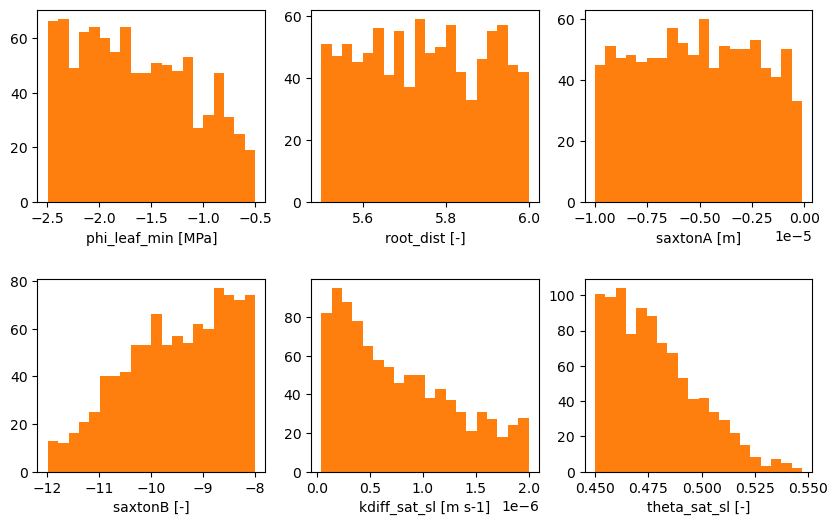

In [148]:
vars_std = ['phi_leaf_min','root_dist', 'saxtonA', 'saxtonB', 'kdiff_sat_sl', 'theta_sat_sl']
units  = ['MPa', '-','m' , '-', 'm s-1', '-']
i=1
fig = plt.figure(figsize=(10,6))
for var in vars_std:
    ax = fig.add_subplot(2, 3, i)
    ax.hist(slice_opt_std[var], color = 'tab:orange', bins = 20)
    ax.set_xlabel(f"{var} [{units[i-1]}]")
    
    i+=1
plt.subplots_adjust(hspace = 0.4)

rtpath = "/Net/Groups/BSI/work_scratch/ppapastefanou/src/quincy_recipies/science/hainich/plt"

plt.savefig(f"{rtpath}/hist_std.png")

(4755, 23)


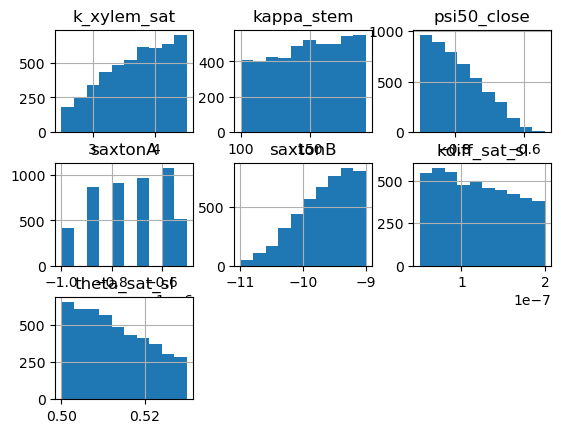

In [69]:
slice_opt_hyd= df_rmse[(df_rmse['slope_gpp17-19']  < -0.2) & (df_rmse['rmse_gpp_22'] < 3.3)]
print(slice_opt_hyd.shape)
#slice_opt_hyd.sort_values(by= 'rmse_gpp_22')[0:30]['fid'].to_list();
slice_opt_hyd[['k_xylem_sat','kappa_stem','psi50_close', 'saxtonA', 'saxtonB', 'kdiff_sat_sl', 'theta_sat_sl']].hist();

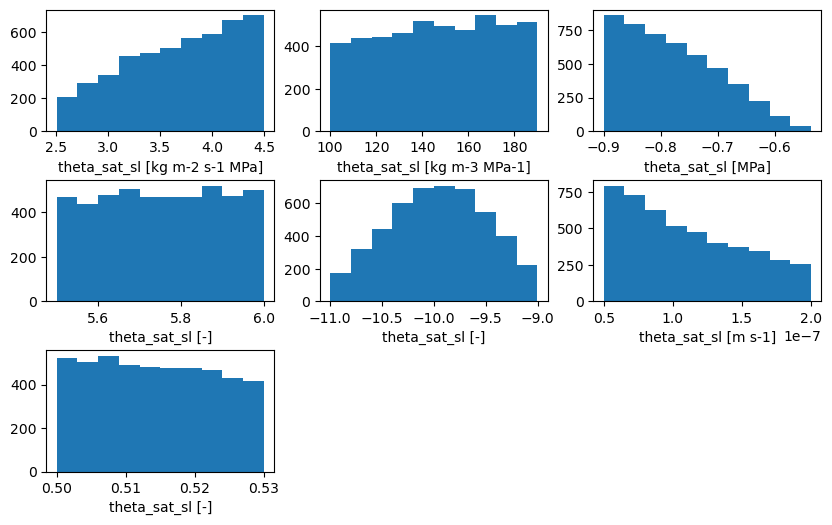

In [149]:
vars_hyd = ['k_xylem_sat','kappa_stem','psi50_close', 'root_dist', 'saxtonB', 'kdiff_sat_sl', 'theta_sat_sl']
units  = ['kg m-2 s-1 MPa', 'kg m-3 MPa-1', 'MPa','-' , '-', 'm s-1', '-']
i=1
fig = plt.figure(figsize=(10,6))
for v in vars_hyd:
    ax = fig.add_subplot(3, 3, i)
    ax.hist(slice_opt_hyd[v], color = 'tab:blue', bins = 10)
    ax.set_xlabel(f"{var} [{units[i-1]}]")
    
    i+=1
plt.subplots_adjust(hspace = 0.4)

rtpath = "/Net/Groups/BSI/work_scratch/ppapastefanou/src/quincy_recipies/science/hainich/plt"

plt.savefig(f"{rtpath}/hist_hyd_1.png")

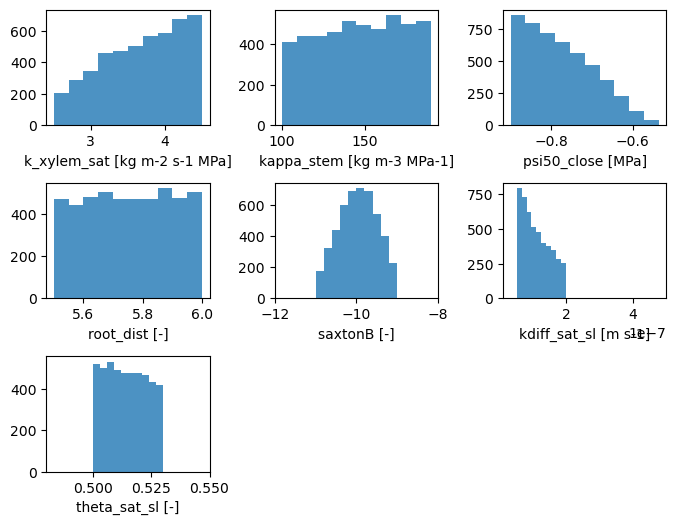

In [172]:
slice_opt_hyd= df_rmse[(df_rmse['slope_gpp17-19']  < -0.4) & (df_rmse['rmse_gpp_22'] < 3.4)]
vars_hyd = ['k_xylem_sat','kappa_stem','psi50_close', 'root_dist', 'saxtonB', 'kdiff_sat_sl', 'theta_sat_sl']
units  = ['kg m-2 s-1 MPa', 'kg m-3 MPa-1', 'MPa','-' , '-', 'm s-1', '-']
i=1
fig = plt.figure(figsize=(8,6))
for v in vars_hyd:
    ax = fig.add_subplot(3, 3, i)
    ax.hist(slice_opt_hyd[v], color = 'tab:blue', bins = 10, alpha = 0.8)
    ax.set_xlabel(f"{v} [{units[i-1]}]")
    
    i+=1
    
    if v == "saxtonB":
        ax.set_xlim((-12,-8))
    if v == "kdiff_sat_sl":
        ax.set_xlim((1E-8,0.5E-6))
    if v == "theta_sat_sl":
        ax.set_xlim(0.48, 0.55)
plt.subplots_adjust(hspace = 0.5, wspace= 0.4)


rtpath = "/Net/Groups/BSI/work_scratch/ppapastefanou/src/quincy_recipies/science/hainich/plt"

plt.savefig(f"{rtpath}/hist_hyd_1.png")

(288, 23)


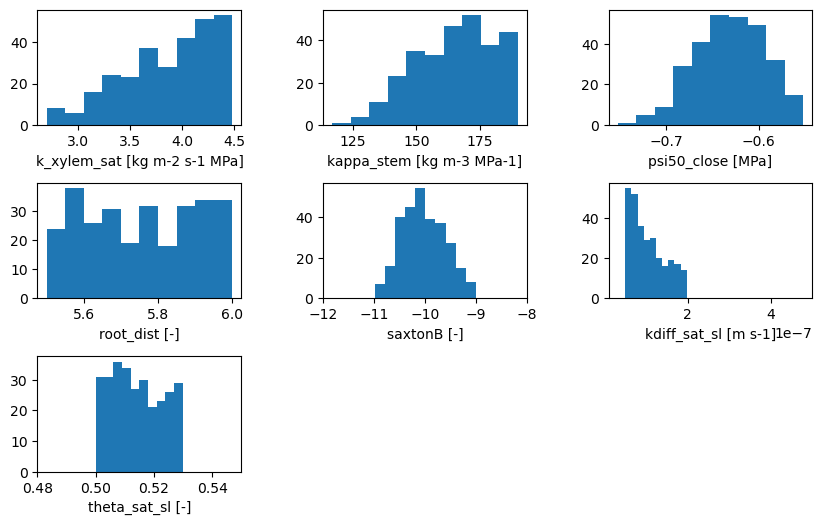

In [173]:
slice_opt_hyd= df_rmse[(df_rmse['slope_gpp17-19']  < -0.5) & (df_rmse['rmse_gpp_22'] < 3.5) &(df_rmse['rmse_psi_stem'] < 0.11)]
print(slice_opt_hyd.shape)
vars_hyd = ['k_xylem_sat','kappa_stem','psi50_close', 'root_dist', 'saxtonB', 'kdiff_sat_sl', 'theta_sat_sl']
units  = ['kg m-2 s-1 MPa', 'kg m-3 MPa-1', 'MPa','-' , '-', 'm s-1', '-']
i=1
fig = plt.figure(figsize=(10,6))
for v in vars_hyd:
    ax = fig.add_subplot(3, 3, i)
    ax.hist(slice_opt_hyd[v], color = 'tab:blue', bins = 10)
    ax.set_xlabel(f"{v} [{units[i-1]}]")
    
    i+=1
    
    if v == "saxtonB":
        ax.set_xlim((-12,-8))
    if v == "kdiff_sat_sl":
        ax.set_xlim((1E-8,0.5E-6))
    if v == "theta_sat_sl":
        ax.set_xlim(0.48, 0.55)
plt.subplots_adjust(hspace = 0.5, wspace= 0.4)

rtpath = "/Net/Groups/BSI/work_scratch/ppapastefanou/src/quincy_recipies/science/hainich/plt"

plt.savefig(f"{rtpath}/hist_hyd_2.png")

In [16]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19'] < -0.2) & (df_rmse['rmse_gpp_22'] < 3.2)&(df_rmse['rmse_psi_stem'] < 0.13)]
slice_psi_stem.sort_values(by= 'slope_gpp17-19')

,phi_leaf_min,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19


(1178, 23)


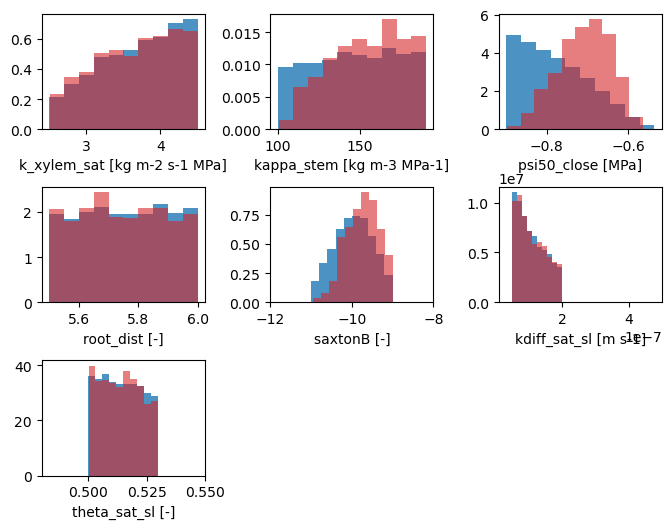

In [174]:
slice_opt_hyd_1= df_rmse[(df_rmse['slope_gpp17-19']  < -0.4) & (df_rmse['rmse_gpp_22'] < 3.4) ]
slice_opt_hyd_2= df_rmse[(df_rmse['slope_gpp17-19']  < -0.4) & (df_rmse['rmse_gpp_22'] < 3.4) &(df_rmse['rmse_psi_stem'] < 0.125)]
print(slice_opt_hyd_2.shape)
vars_hyd = ['k_xylem_sat','kappa_stem','psi50_close', 'root_dist', 'saxtonB', 'kdiff_sat_sl', 'theta_sat_sl']
units  = ['kg m-2 s-1 MPa', 'kg m-3 MPa-1', 'MPa','-' , '-', 'm s-1', '-']
i=1
fig = plt.figure(figsize=(8,6))
for v in vars_hyd:
    ax = fig.add_subplot(3, 3, i)
    ax.hist(slice_opt_hyd_1[v], color = 'tab:blue', bins = 10, density=True, alpha = 0.8)
    ax.hist(slice_opt_hyd_2[v], color = 'tab:red', bins = 10, density=True, alpha = 0.6)
    ax.set_xlabel(f"{v} [{units[i-1]}]")
    
    if v == "saxtonB":
        ax.set_xlim((-12,-8))
    if v == "kdiff_sat_sl":
        ax.set_xlim((1E-8,0.5E-6))
    if v == "theta_sat_sl":
        ax.set_xlim(0.48, 0.55)
    
    i+=1
plt.subplots_adjust(hspace = 0.5, wspace= 0.4)

rtpath = "/Net/Groups/BSI/work_scratch/ppapastefanou/src/quincy_recipies/science/hainich/plt"

plt.savefig(f"{rtpath}/hist_hyd_3.png")

(168, 23)


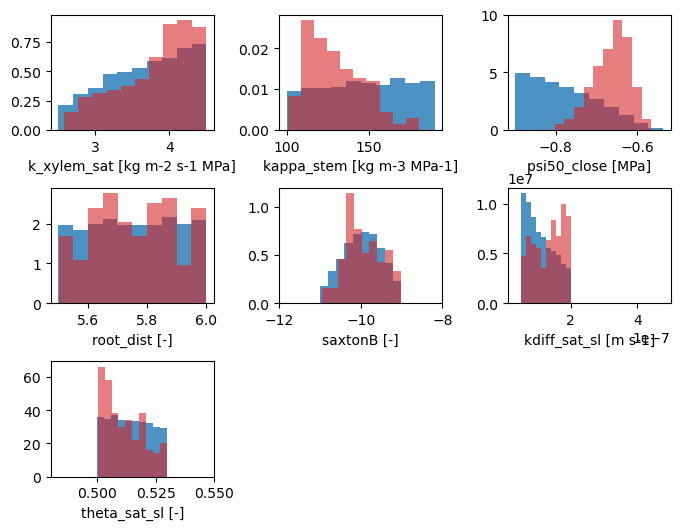

In [175]:
slice_opt_hyd_1= df_rmse[(df_rmse['slope_gpp17-19']  < -0.4) & (df_rmse['rmse_gpp_22'] < 3.4) ]
slice_opt_hyd_2= df_rmse[(df_rmse['slope_gpp17-19']  < -0.4) & (df_rmse['rmse_gpp_22'] < 3.4)
                         &(df_rmse['rmse_psi_stem'] < 0.125)&(df_rmse['rmse_sapflow_norm'] < 0.225)]
print(slice_opt_hyd_2.shape)
vars_hyd = ['k_xylem_sat','kappa_stem','psi50_close', 'root_dist', 'saxtonB', 'kdiff_sat_sl', 'theta_sat_sl']
units  = ['kg m-2 s-1 MPa', 'kg m-3 MPa-1', 'MPa','-' , '-', 'm s-1', '-']
i=1
fig = plt.figure(figsize=(8,6))
for v in vars_hyd:
    ax = fig.add_subplot(3, 3, i)
    ax.hist(slice_opt_hyd_1[v], color = 'tab:blue', bins = 10, density=True, alpha = 0.8)
    ax.hist(slice_opt_hyd_2[v], color = 'tab:red', bins = 10, density=True, alpha = 0.6)
    ax.set_xlabel(f"{v} [{units[i-1]}]")
    
    if v == "saxtonB":
        ax.set_xlim((-12,-8))
    if v == "kdiff_sat_sl":
        ax.set_xlim((1E-8,0.5E-6))
    if v == "theta_sat_sl":
        ax.set_xlim(0.48, 0.55)
    
    i+=1
plt.subplots_adjust(hspace = 0.5, wspace= 0.4)

rtpath = "/Net/Groups/BSI/work_scratch/ppapastefanou/src/quincy_recipies/science/hainich/plt"

plt.savefig(f"{rtpath}/hist_hyd_4.png")


In [176]:
slice_opt_hyd_2.corr("spearman")

,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
k_xylem_sat,1.000000,0.030153,0.030153,0.075445,0.591238,-0.043288,-0.003269,0.055684,-0.099276,0.013454,...,NaN,NaN,-0.126442,-0.195373,-0.256837,-0.264123,-0.442901,-0.200472,-0.155744,-0.247288
id,0.030153,1.000000,1.000000,0.101224,0.032010,-0.090028,0.123450,-0.017541,0.119315,0.046914,...,NaN,NaN,-0.060045,0.004368,-0.101154,0.042326,-0.032122,0.039605,0.130676,-0.001250
fid,0.030153,1.000000,1.000000,0.101224,0.032010,-0.090028,0.123450,-0.017541,0.119315,0.046914,...,NaN,NaN,-0.060045,0.004368,-0.101154,0.042326,-0.032122,0.039605,0.130676,-0.001250
kappa_stem,0.075445,0.101224,0.101224,1.000000,0.473720,0.002979,-0.099646,-0.378488,0.347796,-0.279207,...,NaN,NaN,-0.660841,-0.608625,0.208756,-0.112925,0.252945,0.281245,0.251831,-0.084885
psi50_close,0.591238,0.032010,0.032010,0.473720,1.000000,-0.036088,-0.186725,-0.110232,-0.011131,-0.012386,...,NaN,NaN,-0.290657,-0.236641,0.373252,-0.167181,0.065577,-0.144039,-0.123240,-0.450299
root_dist,-0.043288,-0.090028,-0.090028,0.002979,-0.036088,1.000000,-0.067875,0.245028,0.006942,0.119304,...,NaN,NaN,0.022788,-0.052564,-0.033504,-0.076645,-0.125108,-0.136244,0.070452,0.011860
saxtonA,-0.003269,0.123450,0.123450,-0.099646,-0.186725,-0.067875,1.000000,-0.191441,-0.047804,0.001468,...,NaN,NaN,0.079232,0.101907,-0.108499,-0.068989,-0.137630,-0.141492,0.116690,0.138854
saxtonB,0.055684,-0.017541,-0.017541,-0.378488,-0.110232,0.245028,-0.191441,1.000000,-0.610700,0.648597,...,NaN,NaN,0.274500,0.525210,-0.182842,0.123754,-0.249080,-0.547190,0.309137,0.197306
kdiff_sat_sl,-0.099276,0.119315,0.119315,0.347796,-0.011131,0.006942,-0.047804,-0.610700,1.000000,-0.250361,...,NaN,NaN,-0.149298,-0.302651,-0.131023,0.052222,0.222116,0.632329,-0.204362,0.014856
theta_sat_sl,0.013454,0.046914,0.046914,-0.279207,-0.012386,0.119304,0.001468,0.648597,-0.250361,1.000000,...,NaN,NaN,0.132399,0.233419,0.148989,-0.163388,-0.306862,-0.713462,0.322577,0.032371


In [30]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19'] < -0.3) & (df_rmse['rmse_gpp_22'] < 3.3)]
slice_psi_stem.sort_values(by = 'rmse_gpp_22')


,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,saxtonA,saxtonB,kdiff_sat_sl,theta_sat_sl,...,gdd_t_air_req,k_gdd,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
27524,3.90185,27524,27524,177.61355,-0.72320,5.44393,-4.000000e-07,-9.84137,1.108768e-07,0.50001,...,378.48330,0.01342,0.130548,1.189367,3.152135,2.944176,37.587229,35.205434,0.259355,-0.324919
16178,3.68038,16178,16178,174.73736,-0.73450,5.34246,-2.000000e-07,-10.30274,3.157777e-07,0.51523,...,344.25126,0.01289,0.143260,1.530917,3.159729,2.943016,37.707926,35.349486,0.254273,-0.300210
2438,3.89867,2438,2438,181.39520,-0.70879,5.72652,-3.000000e-07,-10.01457,1.883359e-07,0.50511,...,376.63875,0.01264,0.142066,1.410336,3.162264,2.926756,37.577141,35.170586,0.244839,-0.320046
5728,3.81983,5728,5728,144.02710,-0.70754,5.37758,-6.000000e-07,-10.31744,2.152799e-07,0.50028,...,386.65354,0.01419,0.127578,1.546594,3.175359,2.986862,38.019203,36.867781,0.207910,-0.337316
12425,3.97116,12425,12425,167.49392,-0.73906,5.31052,-9.000000e-07,-10.15822,4.541845e-07,0.52543,...,413.92728,0.01331,0.103428,0.852649,3.181482,2.998075,37.900297,36.657864,0.237993,-0.381580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,3.97526,5040,5040,135.39975,-0.74737,5.35908,-5.000000e-07,-9.63962,2.670183e-07,0.51617,...,413.75126,0.01392,0.127868,2.313683,3.297521,2.980820,37.854179,34.984124,0.230531,-0.388609
31094,3.89726,31094,31094,162.32706,-0.71129,5.54413,-9.000000e-07,-9.97675,3.958175e-07,0.50953,...,388.03315,0.01282,0.142537,0.672347,3.297645,2.981643,38.278587,36.514450,0.251563,-0.529659
64,3.83193,64,64,163.78392,-0.72714,5.61895,-3.000000e-07,-9.29951,1.666868e-07,0.54179,...,384.60065,0.01345,0.118273,0.744156,3.298190,3.037623,37.921996,34.258132,0.231028,-0.479772
7478,3.88376,7478,7478,177.08999,-0.71863,5.71442,-5.000000e-07,-9.86459,1.641952e-07,0.51248,...,318.92019,0.01436,0.106727,0.731450,3.298965,2.950944,37.527980,34.976939,0.262156,-0.376337


In [19]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19'] < -0.1) &(df_rmse['slope_gpp17-19'] > -0.4)]
print(slice_psi_stem.shape)
y = slice_psi_stem.mean().to_frame()
slice_psi_stem.sort_values(by = 'slope_gpp17-19')['fid'].to_list()
#slice_psi_stem.sort_values(by = 'slope_gpp17-19')

(2597, 18)


[3160,
 6813,
 3822,
 3346,
 4417,
 5857,
 201,
 5820,
 5700,
 1244,
 2163,
 955,
 1236,
 2490,
 3356,
 2603,
 4916,
 6468,
 7196,
 910,
 2420,
 102,
 2102,
 2857,
 5021,
 6566,
 5912,
 6731,
 2030,
 6423,
 6761,
 5723,
 7163,
 6141,
 3997,
 6201,
 3002,
 811,
 1610,
 2736,
 1407,
 5270,
 7242,
 984,
 4447,
 6179,
 1157,
 1281,
 5146,
 6748,
 2617,
 7207,
 2428,
 1773,
 7341,
 460,
 5736,
 7473,
 3680,
 1606,
 2139,
 6253,
 6292,
 4659,
 3682,
 5360,
 3348,
 6263,
 4050,
 3223,
 4200,
 1086,
 120,
 3289,
 2220,
 939,
 6422,
 7465,
 7625,
 732,
 4209,
 6734,
 6907,
 6497,
 5563,
 1373,
 2385,
 2344,
 2390,
 800,
 792,
 6341,
 1432,
 55,
 4570,
 7225,
 2541,
 7526,
 2254,
 2485,
 850,
 6320,
 5768,
 7333,
 2078,
 7161,
 4706,
 4518,
 4487,
 1573,
 1522,
 6537,
 2621,
 3363,
 4837,
 4754,
 366,
 4814,
 1906,
 4975,
 271,
 2812,
 1596,
 6608,
 5812,
 3395,
 5915,
 7147,
 601,
 1163,
 3065,
 400,
 7123,
 855,
 6499,
 2570,
 5328,
 2393,
 1776,
 3749,
 5985,
 1160,
 1908,
 6322,
 1559,
 5944

In [12]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.1) & (df_rmse['rmse_gpp_22'] < 3.8)]
print(slice_psi_stem.shape)
x = slice_psi_stem.mean().to_frame()

(12, 23)


In [19]:
pd.concat([x,y], axis = 1)

,0,0
k_xylem_sat,1.632756,1.392083e+00
id,3954.750000,3.739402e+03
fid,3954.750000,3.739402e+03
kappa_stem,337.379506,5.743487e+02
kappa_leaf,0.004866,4.757350e-03
k_latosa,4378.037441,4.483900e+03
g0,0.004741,5.667692e-03
g1,3.991393,4.040158e+00
psi50_close,-2.287761,-2.227933e+00
root_dist,2.613124,5.958142e+00


In [17]:
slice_psi_stem = df_rmse[(df_rmse['rmse_psi_stem'] < 0.12) & (df_rmse['rmse_gpp_24'] < 3.27)& (df_rmse['rmse_le_24'] < 46.9)& (df_rmse['kappa_stem'] < 146.9)]
print(slice_psi_stem.shape)
slice_psi_stem

(0, 18)


,k_xylem_sat,id,fid,kappa_stem,psi50_close,root_dist,silt,sand,root_scale,slope_leaf_close,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19


In [18]:
df_rmse['rmse_psi_stem'] < 0.1

0       False
1       False
2        True
3        True
4        True
        ...  
7675    False
7676    False
7677    False
7678    False
7679    False
Name: rmse_psi_stem, Length: 7680, dtype: bool

In [8]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19'] < -0.1) &(df_rmse['slope_gpp17-19'] > -0.5)]
slice_psi_stem.sort_values(by = 'slope_gpp17-19')

,k_xylem_sat,id,fid,kappa_stem,kappa_leaf,k_latosa,g0,g1,psi50_close,root_dist,...,slope_leaf_close,g_res,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
3050,7.12663,3050,3050,181.79840,0.00129,4975.72012,0.01657,4.18625,-2.11064,6.07120,...,2.42946,0.00000,1.886025,1.303184,3.621833,3.450263,41.744208,43.302107,0.274024,-0.494416
16317,7.36067,16317,16317,379.47151,0.00191,3726.30267,0.02566,4.48837,-2.22848,4.26581,...,3.80576,0.00013,1.744992,1.508668,3.674824,3.316684,41.902701,44.006849,0.381554,-0.462265
8220,7.19042,8220,8220,142.77323,0.00190,3457.81458,0.02105,4.06892,-2.34157,6.39746,...,3.99327,0.00000,2.026807,1.283532,3.847743,3.471572,41.510224,42.880313,0.268770,-0.427161
15476,5.10867,15476,15476,108.23469,0.00106,3388.17495,0.02737,3.58814,-2.13659,5.45557,...,3.83835,0.00000,1.634213,1.185986,3.826736,3.312410,41.696434,42.856126,0.249182,-0.388104
14592,5.68199,14592,14592,178.28710,0.00096,3305.15757,0.02782,3.63422,-2.14758,6.43853,...,2.17614,0.00003,1.781059,1.215818,3.903474,3.345852,42.181743,43.384342,0.271171,-0.376869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15556,6.24602,15556,15556,161.91849,0.00192,4552.62436,0.01466,4.44771,-2.26033,5.63616,...,2.75917,0.00000,1.679320,1.355636,3.476238,3.338658,42.514716,45.140637,0.311842,-0.101928
15238,2.73490,15238,15238,132.60065,0.00205,4844.32529,0.00878,4.32299,-2.42628,6.19859,...,2.97350,0.00004,1.729567,1.301366,3.457513,3.352219,41.701376,44.051572,0.258285,-0.101269
11441,6.62456,11441,11441,319.65484,0.00170,4403.28375,0.02086,4.29294,-2.09868,6.31746,...,3.26080,0.00000,1.383721,1.473296,3.503242,3.329053,42.071607,44.102831,0.316309,-0.101193
1267,5.44054,1267,1267,311.33566,0.00973,4562.75088,0.00763,4.07190,-2.00118,4.69115,...,3.17369,0.00013,1.398537,1.459052,3.501019,3.315061,41.103466,42.996485,0.354146,-0.100636


,k_xylem_sat,id,fid,kappa_stem,kappa_leaf,k_latosa,g0,g1,psi50_close,root_dist,...,slope_leaf_close,g_res,rmse_psi_stem,rmse_psi_stem_norm,rmse_gpp_22,rmse_gpp_24,rmse_le_22,rmse_le_24,rmse_sapflow_norm,slope_gpp17-19
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,6.183293,8253.328125,8253.328125,337.249592,0.003079,4312.460016,0.016151,4.158582,-2.200374,5.477713,...,2.828006,0.000059,1.601844,1.439745,3.579033,3.322312,41.838605,43.735401,0.343497,-0.180855
std,2.098295,4981.635748,4981.635748,109.616285,0.002441,467.656887,0.007160,0.283818,0.135668,0.870433,...,0.731041,0.000138,0.240179,0.082969,0.106221,0.039478,0.723023,1.099291,0.038095,0.082110
min,2.553800,19.000000,19.000000,101.825890,0.000550,3305.157570,0.005350,3.511700,-2.498870,2.872550,...,1.178510,0.000000,0.867407,1.125570,3.399654,3.232545,40.671598,41.836024,0.216230,-0.494416
25%,4.503705,4087.750000,4087.750000,239.114008,0.001385,3962.003068,0.009692,4.047555,-2.296867,5.011245,...,2.283243,0.000000,1.479921,1.407203,3.499443,3.295305,41.332215,42.958789,0.320309,-0.208726
50%,6.176820,7949.000000,7949.000000,364.173265,0.002280,4402.748030,0.015530,4.221305,-2.203435,5.633255,...,2.952775,0.000010,1.636125,1.463343,3.558010,3.318647,41.694507,43.615643,0.358493,-0.150278
75%,8.255395,12791.500000,12791.500000,423.129230,0.003398,4689.592932,0.021410,4.399390,-2.081593,6.160592,...,3.395212,0.000043,1.771357,1.496977,3.633161,3.349883,42.282513,44.378341,0.371531,-0.120856
max,9.473780,16317.000000,16317.000000,498.803430,0.009730,4988.816660,0.029910,4.494640,-2.001180,6.498610,...,3.993270,0.001070,2.131521,1.542873,3.903474,3.471572,45.064102,48.332269,0.387675,-0.100428


In [35]:
slice_psi_stem.sort_values(by = 'rmse_psi_stem', ascending=False)['fid'].to_list()

[4500,
 627,
 12283,
 3609,
 15405,
 3668,
 7024,
 1885,
 4878,
 8000,
 13183,
 9586,
 11197,
 6050,
 7527,
 11823,
 13293,
 5121,
 10434,
 11336,
 157,
 6801,
 5289,
 15197,
 16348,
 15201,
 7086,
 4310,
 5195,
 8556,
 9535,
 15691,
 1632,
 14985,
 1556,
 10872,
 2581,
 4763,
 1194,
 14746,
 11448,
 15062,
 14805,
 4970,
 12127,
 2579,
 3058,
 2210,
 11083,
 13774,
 12171,
 5757,
 632,
 3664,
 1770,
 1094,
 2322,
 9941,
 9643,
 2475,
 8665,
 7131,
 5476,
 11688,
 6101,
 11897,
 14544,
 1862,
 6982,
 3470,
 7735,
 466,
 9897,
 5026,
 2531,
 8284,
 3194,
 6816,
 5145,
 6998,
 1458,
 11399,
 10628,
 13935,
 2736,
 4622,
 7427,
 15648,
 4224,
 8285,
 15961,
 1311,
 12294,
 10543,
 8524,
 346,
 4703,
 4116,
 11248,
 3196,
 11937,
 14464,
 6435,
 10906,
 11288,
 397,
 7708,
 15574,
 15256,
 12537,
 6817,
 11199,
 3405,
 11513,
 4318,
 1423,
 9395,
 13076,
 2883,
 6315,
 9187,
 2927,
 631,
 10294,
 15494,
 14704,
 10128,
 9362,
 15974,
 7260,
 2587,
 4761,
 555,
 7923,
 2098,
 815,
 5826,
 1

In [40]:
slice_psi_stem = df_rmse[(df_rmse['slope_gpp17-19'] < -0.1) &(df_rmse['slope_gpp17-19'] > -0.5)]
slice_psi_stem.sort_values(by = 'slope_gpp17-19', ascending=False)['fid'].to_list()


[8193,
 454,
 11671,
 6521,
 12277,
 4576,
 9792,
 1387,
 13066,
 10347,
 12123,
 4217,
 15260,
 7585,
 10066,
 8354,
 294,
 10220,
 14573,
 12272,
 6477,
 1730,
 7831,
 7424,
 5047,
 5024,
 15688,
 5637,
 7558,
 1084,
 10299,
 12937,
 8971,
 2968,
 9942,
 6953,
 9210,
 6655,
 10759,
 11797,
 8514,
 1662,
 3815,
 9177,
 11373,
 12779,
 14038,
 4359,
 14222,
 8408,
 6225,
 1101,
 5157,
 12958,
 10141,
 2392,
 1997,
 16113,
 13579,
 1133,
 13083,
 5652,
 5243,
 4493,
 11157,
 10457,
 10920,
 2202,
 6333,
 4173,
 7428,
 16250,
 9331,
 5980,
 14936,
 16171,
 12440,
 15008,
 14335,
 3499,
 69,
 13060,
 4508,
 9788,
 6851,
 6827,
 12201,
 14659,
 14243,
 11431,
 7287,
 7444,
 2867,
 12635,
 12308,
 1222,
 7394,
 10562,
 12908,
 7520,
 2707,
 8337,
 15823,
 14815,
 5298,
 13406,
 13861,
 4897,
 4536,
 2139,
 13751,
 15676,
 8547,
 12258,
 7126,
 9644,
 16367,
 4738,
 7064,
 14467,
 15529,
 12798,
 1252,
 6021,
 3641,
 4403,
 1816,
 14296,
 6126,
 768,
 9512,
 4955,
 2096,
 5841,
 935,
 12343,

In [9]:
import xarray

In [10]:
QNC_ncdf_reader(OUTPUT_DIR)

TypeError: QNC_ncdf_reader.__init__() missing 3 required positional arguments: 'output_cats', 'output_identifier', and 'output_time_res'